Code for Feature deletion and Insertion experiment on Real value datasets.

Before starting please upload "docwords.enron.txt" in root directory.

You can download "docword.enron.txt" from the Data folder of the Main Code

Mapper 5 class is created

In [133]:
import numpy as np
import random
# Without Compensation Mapping

"""
    * class mapper
    *
    * Summary of mapper class:
    *
    *   This class stores the mapping between input vector and output vector.
    *   Implemented methods support feature insertion, deletion and other functionalities.
    *
    * Description:
    *
    *   This class creates a mapping between input vector and output vector when initiated.
    *   Given the input array, it will be able to return a output array.
    *
"""

class mapper5:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters, the random
        *   mapping from input dimension 'd' to output dimension 'k' is created.
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however we compute it using method 'find_compression_length'.
        *   
    """

    def __init__(self, input_dim = 50, out_dim = 15):
        # print("You are in Mapper 5!")
        self.input_dimension = input_dim
        self.output_dimension = self.find_compression_length()
        self.bits = np.random.randint(-1, high= 1, size= input_dim)

        # print ("Generating Mapping. Please wait")

        for i in range(self.bits.size):
            if self.bits[i] == 0:
                self.bits[i] = 1

        self.map = np.zeros(input_dim,dtype=int)
        
        for i in range(input_dim):
            alpha = random.randint(0,self.output_dimension-1)
            self.map[i] = alpha
            
        # print ("Mapping generated")
        
    """
        *
        * function find_compression_length()
        *
        * Summary:
        *   
        *   Calculates appropriate output dimension (compression length) from input dimension.
        *
        * Parameters    : None -- Note: It uses input dimension from global variable.
        *
        * Return Value  : Output Dimension
        *
    """

    def find_compression_length(self):
        return int(0.001*self.input_dimension)+500

    """
        *
        * function insert_feature(position=0)
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted feature in map array at given
        *   position. 
        *   Note: As this mapper is only for deletion, it does not implement bin
        *   expansion here.
        *
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
    """

    def insert_feature(self, position=0):
        if position <= self.input_dimension:
            self.input_dimension += 1
            self.bits = np.insert(self.bits, position, (random.randint(0,1)-0.5)*2)
            alpha = random.randint(0,self.output_dimension-1)
            self.map = np.insert(self.map, position,alpha,axis=0)
            
        else :
            print("Feature position is incorrect !")
        
    """
        *
        * function delete_feature(position=0)
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme is 'No Compensation'
        *   
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """

    def delete_feature(self, position=0):
        if position < self.input_dimension:
        
            self.input_dimension -= 1
            self.bits = np.delete(self.bits, position)
            self.map = np.delete(self.map, position,axis=0)

        else :
            print("Feature position is incorrect !")
        
    """
        *
        * function batch_insert_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, features are inserted in batch.
        *   Note: As this mapper is only for deletion, it does not implement bin
        *   expansion here.
        *
        * Parameters     : batch_positions: List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1
        
        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_insertion = 0
    
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_insertion == 0 :
                self.insert_feature(i+factor)
                factor+=1
                last_insertion +=1
                
            elif flags[i] == 1:
                self.insert_feature(i+factor)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
        

    """
        *
        * function batch_delete_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. The deletion scheme is 'No Compensation'
        *   
        * Parameters     : batch_positions:List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will remain same.
        *
    """

    def batch_delete_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_deletion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                self.delete_feature(i-factor)
                factor+=1
                last_deletion +=1
                
            elif flags[i] == 1:
                self.delete_feature(i-factor)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1

    """
        *
        * function dimension_reduction(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the associated output array
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the output array form associated mapping.
        *
    """

    def dimension_reduction(self, input_array):
        
        output_array = np.zeros(self.output_dimension, dtype=float)

        for i in range(self.input_dimension):
            output_array[self.map[i]] += (self.bits[i])*input_array[i]

        return output_array


    """
        *
        * function input_dim()
        *
        * Summary: 
        *
        *   Method to get input dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.input_dim: Integer
        *
    """

    def input_dim(self):
        return self.input_dim

    """
        *
        * function output_dim()
        *
        * Summary: 
        *
        *   Method to get output dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.output_dim: Integer
        *
    """

    def output_dim(self):
        return self.output_dim

    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_count(self):
        arr = self.get_feature_counter()
        feature_counter = np.zeros(self.output_dimension)

        for i in range(len(arr)):
            feature_counter[i] += len(arr[i])

        return feature_counter


    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_counter(self):
        feature_count = []
        temp = []
        for i in range(self.output_dimension):
            feature_count.append(temp)
            temp = []
        
        for i in range(self.input_dimension-1):
            feature_count[self.map[i]].append(i)

        # print (feature_count)
        return feature_count

    """
        *
        * function get_mapping_info()
        *
        * Summary: 
        *
        *   A function to print mapping information.
        *   
        * Parameters     : None
        *
        * Return Value  : Nothing -- Note: Prints associated mapping information on console.
        *
        * Description:
        *
        *   This method is useful for debugging purposes.
        *
    """

    def get_mapping_info(self):
        print ("Input Features:",self.input_dimension)
        print ("Output Features:",self.output_dimension)
        print ("Features Distribution:",self.get_feature_counter())
        print ("Features Distribution Count:",self.get_feature_count())
        print("Map", self.map)
        print("Bits", self.bits)






Mapper 6 class is created.

In [134]:

class mapper6:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters, the random
        *   mapping from input dimension 'd' to output dimension 'k' is created.
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however we compute it using method 'find_compression_length'.
        *   
    """
    def __init__(self, input_dim = 50, out_dim = 15):
        # print ("You are using mapper 6.")
        self.input_dimension = input_dim
        self.output_dimension = self.find_compression_length()
        self.bits = np.random.randint(-1, high= 1, size= input_dim)

        # print ("Generating Mapping. Please wait")

        for i in range(self.bits.size):
            if self.bits[i] == 0:
                self.bits[i] = 1

        self.map = np.zeros(input_dim,dtype=int)
        # self.feature_counter = []
        # for i in range(out_dim):
        #     self.feature_counter.append([])

        self.map = np.random.randint(0, high=self.output_dimension, size=self.input_dimension, dtype=int)

        # for i in range(input_dim):
        #     alpha = random.randint(0,self.output_dimension-1)
        #     self.map[i] = alpha
            # self.feature_counter[alpha].append(i)
        print ("Mapping generated")
        # print ("Mapping :",self.map)
        # print ("Feature :",self.feature_counter)

        #print("Initializing...\n", "Bits:", self.bits, "\nMap:", self.map)


    """
        *
        * function find_compression_length()
        *
        * Summary:
        *   
        *   Calculates appropriate output dimension (compression length) from input dimension.
        *
        * Parameters    : None -- Note: It uses input dimension from global variable.
        *
        * Return Value  : Output Dimension
        *
    """
    def find_compression_length(self):
        return int(0.001*self.input_dimension)+1000

    
    """
        *
        * function insert_feature(position=0)
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted feature in map array at given
        *   position. 
        *   Insertion scheme used is "Bin expansion"
        *
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
    """

    def insert_feature(self, position=0):
        self.input_dimension+=1

        if self.output_dimension == self.find_compression_length():
            
            # print ("Inserting new feature at the ",position,"of data.")
            if position <= self.input_dimension:
                # self.input_dimension += 1
                self.bits = np.insert(self.bits, position, (random.randint(0,1)-0.5)*2)
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print("Bits:", self.bits)
            # print("Map:", self.map)
            # print("feature_counter :",self.feature_counter)

        else:

            # temp_map = np.random.randint(0, high=self.output_dimension+1, size = self.output_dimension, dtype=int)
            # temp_map = np.array(range(self.output_dimension))
            # # print("tempmap",temp_map)
            # for i in range(self.input_dimension-1):
            #     # print(self.map[i])
            #     self.map[i] = temp_map[self.map[i]]
            # # print("map",self.map)
            # self.output_dimension = self.find_compression_length()
            # # print ("outdim",self.output_dimension)
            if position <= self.input_dimension:
                # self.input_dimension += 1
                # self.get_mapping_info()
                self.bits = np.insert(self.bits, position, (random.randint(0,1)-0.5)*2)
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)

                feature_selected = int(self.input_dimension/self.output_dimension)
                for i in range(feature_selected):
                    alpha = random.randint(0,self.input_dimension-1)
                    # print("alpha_val:",alpha)
                    self.map[alpha]=self.output_dimension
                self.output_dimension+=1
            

                # self.get_mapping_info()
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)

        # print("outdim", self.output_dimension)
        # print("map:")
        # for i in self.map:
        #     if i >= self.output_dimension:
        #         print(i, ", "),


    """
        *
        * function delete_feature(position=0)
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme is '1 step Compensation'
        *   
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """
    def delete_feature(self, position=0):
        # print ("position to be deleted:",position)
        if position < self.input_dimension:
            beta=self.map[position]
            # print ("Copressed feature is non-uniform:",beta)
            # print ("beta:",beta)
            alpha = random.randint(0,self.input_dimension-1)
            count = 0
            while self.map[alpha] == beta:
                alpha = random.randint(0,self.input_dimension-1)
                if count > 10 :
                    break
                count += 1
            # print ("mapping from :",alpha,"is compensated to:",beta)
            self.map[alpha] = beta
            self.input_dimension -= 1
            self.bits = np.delete(self.bits, position)
            self.map = np.delete(self.map, position,axis=0)
            
            
            # updated_feature_counter_array = []
            # for i in range(self.input_dimension):
            #     if self.map[i][beta] == 1:
            #         updated_feature_counter_array.append(i)
            # self.feature_counter[beta] = updated_feature_counter_array

            # print (self.feature_counter[beta])


        else :
            print("Feature position is incorrect !")
        # print("Deleted Index:", position)
        # print("Maping Changed for position:", alpha)
        # print("Bits:", self.bits)
        # print("Map:", self.map)
        # print("Update feature_counter :",self.get_feature_counter())

    """
        *
        * function batch_insert_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, features are inserted in batch.
        *
        * Parameters     : batch_positions: List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1
            # self.insert_feature(position=batch_positions[i])

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_insertion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_insertion == 0 :
                self.insert_feature(i+factor)
                factor+=1
                last_insertion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.insert_feature(i+factor)#-last_insertion)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
            #self.get_mapping_info()
        # print ("end")

    
    """
        *
        * function batch_delete_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. The deletion scheme is '1 step Compensation'
        *   
        * Parameters     : batch_positions:List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will remain same.
        *
    """

    def batch_delete_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_deletion = 0
        # print ("starting deletion")
        while i < old_dim:

            # print ("-",i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                self.delete_feature(i-factor)
                factor+=1
                last_deletion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.delete_feature(i-factor)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1


        # for i in range(len(batch_positions)):
        #     self.delete_feature(position=batch_positions[i])

    """
        *
        * function dimension_reduction(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the associated output array
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the output array form associated mapping.
        *
    """

    def dimension_reduction(self, input_array):
        # output_array = np.zeros(self.output_dimension, dtype=float)

        # for i in range(self.input_dimension):
        #     if self.map[i] != -1:
        #         output_array[self.map[i]] += (self.bits[i])*input_array[i]
        output_array = np.zeros(self.output_dimension, dtype=float)

        for i in range(self.input_dimension):
            output_array[self.map[i]] += (self.bits[i])*input_array[i]

        return output_array


        # return output_array

    
    
    """
        *
        * function input_dim()
        *
        * Summary: 
        *
        *   Method to get input dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.input_dim: Integer
        *
    """

    def input_dim(self):
        return self.input_dim

    """
        *
        * function output_dim()
        *
        * Summary: 
        *
        *   Method to get output dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.output_dim: Integer
        *
    """


    def output_dim(self):
        return self.output_dim

    
    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_count(self):
        arr = self.get_feature_counter()
        feature_counter = np.zeros(self.output_dimension)

        for i in range(len(arr)):
            feature_counter[i] += len(arr[i])

        return feature_counter

        # return self.feature_counter

    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_counter(self):
        feature_count = []
        temp = []
        for i in range(self.output_dimension):
            feature_count.append(temp)
            temp = []
        
        # print("Input D")
        # print(self.map)
        for i in range(self.input_dimension-1):
            # print("i", i)
            # print("map_i", self.map)
            # print("lenfc", len(feature_count))
            # print("out_dim", self.output_dimension)
            # print("funoutdim", self.find_compression_length())
            feature_count[self.map[i]].append(i)

        # print (feature_count)
        return feature_count

    
    """
        *
        * function get_mapping_info()
        *
        * Summary: 
        *
        *   A function to print mapping information.
        *   
        * Parameters     : None
        *
        * Return Value  : Nothing -- Note: Prints associated mapping information on console.
        *
        * Description:
        *
        *   This method is useful for debugging purposes.
        *
    """
    def get_mapping_info(self):
        print ("Input Features:",self.input_dimension)
        print ("Output Features:",self.output_dimension)
        print ("Features Distribution:",self.get_feature_counter())
        print ("Features Distribution Count:",self.get_feature_count())
        print("Map", self.map)
        print("Bits", self.bits)





Mapper 9 class is created

In [135]:
class mapper9:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters, the random
        *   mapping from input dimension 'd' to output dimension 'k' is created.
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however we compute it using method 'find_compression_length'.
        *   
    """
    def __init__(self, input_dim = 50, out_dim = 15):
        # print ("You are using mapper 9.")
        self.input_dimension = input_dim
        self.output_dimension = self.find_compression_length()
        self.bits = np.random.randint(-1, high= 1, size= input_dim)

        # print ("Generating Mapping. Please wait")

        for i in range(self.bits.size):
            if self.bits[i] == 0:
                self.bits[i] = 1

        self.map = np.zeros(input_dim,dtype=int)
        # self.feature_counter = []
        # for i in range(out_dim):
        #     self.feature_counter.append([])

        self.map = np.random.randint(0, high=self.output_dimension, size=self.input_dimension, dtype=int)

        # for i in range(input_dim):
        #     alpha = random.randint(0,self.output_dimension-1)
        #     self.map[i] = alpha
            # self.feature_counter[alpha].append(i)
        # print ("Mapping generated")
        # print ("Mapping :",self.map)
        # print ("Feature :",self.feature_counter)

        #print("Initializing...\n", "Bits:", self.bits, "\nMap:", self.map)

    """
        *
        * function find_compression_length()
        *
        * Summary:
        *   
        *   Calculates appropriate output dimension (compression length) from input dimension.
        *
        * Parameters    : None -- Note: It uses input dimension from global variable.
        *
        * Return Value  : Output Dimension
        *
    """
       

    def find_compression_length(self):
        return int(0.001*self.input_dimension)+1000

    """
        *
        * function insert_feature(position=0)
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted feature in map array at given
        *   position. 
        *   Insertion scheme used is Bin expansion.
        *
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
    """

    def insert_feature(self, position=0):
        self.input_dimension+=1

        if self.output_dimension == self.find_compression_length():
            
            # print ("Inserting new feature at the ",position,"of data.")
            if position <= self.input_dimension:
                # self.input_dimension += 1
                self.bits = np.insert(self.bits, position, (random.randint(0,1)-0.5)*2)
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print("Bits:", self.bits)
            # print("Map:", self.map)
            # print("feature_counter :",self.feature_counter)

        else:

            # temp_map = np.random.randint(0, high=self.output_dimension+1, size = self.output_dimension, dtype=int)
            temp_map = np.array(range(self.output_dimension))
            # print("tempmap",temp_map)
            for i in range(self.input_dimension-1):
                # print(self.map[i])
                self.map[i] = temp_map[self.map[i]]
            # print("map",self.map)
            self.output_dimension = self.find_compression_length()
            # print ("outdim",self.output_dimension)
            if position <= self.input_dimension:
                # self.input_dimension += 1
                # self.get_mapping_info()
                self.bits = np.insert(self.bits, position, (random.randint(0,1)-0.5)*2)
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # self.get_mapping_info()
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)

        # print("outdim", self.output_dimension)
        # print("map:")
        # for i in self.map:
        #     if i >= self.output_dimension:
        #         print(i, ", "),

    """
        *
        * function delete_feature(position=0)
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme is 'Bin shrinking'
        *   
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """

    def delete_feature(self, position=0):
        self.input_dimension-=1

        if self.output_dimension == self.find_compression_length():
            
            # print ("Inserting new feature at the ",position,"of data.")
            if position <= self.input_dimension:
                # self.input_dimension += 1
                self.bits = np.delete(self.bits, position)
                self.map = np.delete(self.map, position,axis=0)
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print ("No bin reduction")
            # self.get_mapping_info()

        else:

            # temp_map = np.random.randint(0, high=self.output_dimension+1, size = self.output_dimension, dtype=int)
            temp_map = np.array(range(self.output_dimension))
            temp_map[-1] = random.randint(0,self.output_dimension-2)
            # print("tempmap",temp_map)
            for i in range(self.input_dimension-1):
                # print(self.map[i])
                self.map[i] = temp_map[self.map[i]]
            # print("map",self.map)
            self.output_dimension = self.find_compression_length()
            # print ("outdim",self.output_dimension)
            if position <= self.input_dimension:
                # self.input_dimension += 1
                # print("bin reduction")
                # self.get_mapping_info()
                self.bits = np.insert(self.bits, position, (random.randint(0,1)-0.5)*2)
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # self.get_mapping_info()
                # # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)

        # print("outdim", self.output_dimension)
        # print("map:")
        # for i in self.map:
        #     if i >= self.output_dimension:
        #         print(i, ", "),

        # print ("position to be deleted:",position)
        # if position < self.input_dimension:
        #     beta=self.map[position]
        #     # print ("Copressed feature is non-uniform:",beta)
        #     # print ("beta:",beta)
        #     alpha = random.randint(0,self.input_dimension-1)
        #     count = 0
        #     while self.map[alpha] == beta:
        #         alpha = random.randint(0,self.input_dimension-1)
        #         if count > 10 :
        #             break
        #         count += 1
        #     # print ("mapping from :",alpha,"is compensated to:",beta)
        #     self.map[alpha] = beta
        #     self.input_dimension -= 1
        #     self.bits = np.delete(self.bits, position)
        #     self.map = np.delete(self.map, position,axis=0)
            
            
            # updated_feature_counter_array = []
            # for i in range(self.input_dimension):
            #     if self.map[i][beta] == 1:
            #         updated_feature_counter_array.append(i)
            # self.feature_counter[beta] = updated_feature_counter_array

            # print (self.feature_counter[beta])


        # else :
        #     print("Feature position is incorrect !")
        # # print("Deleted Index:", position)
        # print("Maping Changed for position:", alpha)
        # print("Bits:", self.bits)
        # print("Map:", self.map)
        # print("Update feature_counter :",self.get_feature_counter())


    """
        *
        * function batch_insert_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, features are inserted in batch.
        *   Note: As this mapper is only for deletion, it does not implement bin
        *   expansion here.
        *
        * Parameters     : batch_positions: List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1
            # self.insert_feature(position=batch_positions[i])

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_insertion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_insertion == 0 :
                self.insert_feature(i+factor)
                factor+=1
                last_insertion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.insert_feature(i+factor)#-last_insertion)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
            #self.get_mapping_info()
        # print ("end")

    """
        *
        * function batch_delete_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. The deletion scheme is 'Bin shrinking'
        *   
        * Parameters     : batch_positions:List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will remain same.
        *
    """

    def batch_delete_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        # print ("flags",flags)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_deletion = 0
        # print ("starting deletion")
        while i < old_dim:

            # print ("-",i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                self.delete_feature(i-factor)
                factor+=1
                last_deletion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.delete_feature(i-factor)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1


        # for i in range(len(batch_positions)):
        #     self.delete_feature(position=batch_positions[i])

    """
        *
        * function dimension_reduction(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the associated output array
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the output array form associated mapping.
        *
    """

    def dimension_reduction(self, input_array):
        # output_array = np.zeros(self.output_dimension, dtype=float)

        # for i in range(self.input_dimension):
        #     if self.map[i] != -1:
        #         output_array[self.map[i]] += (self.bits[i])*input_array[i]
        output_array = np.zeros(self.output_dimension, dtype=float)

        for i in range(self.input_dimension):
            output_array[self.map[i]] += (self.bits[i])*input_array[i]

        return output_array


        # return output_array

    """
        *
        * function input_dim()
        *
        * Summary: 
        *
        *   Method to get input dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.input_dim: Integer
        *
    """

    def input_dim(self):
        return self.input_dim

    """
        *
        * function output_dim()
        *
        * Summary: 
        *
        *   Method to get output dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.output_dim: Integer
        *
    """

    def output_dim(self):
        return self.output_dim

    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_count(self):
        arr = self.get_feature_counter()
        feature_counter = np.zeros(self.output_dimension)

        for i in range(len(arr)):
            feature_counter[i] += len(arr[i])

        return feature_counter

        # return self.feature_counter
    
    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_counter(self):
        feature_count = []
        temp = []
        for i in range(self.output_dimension):
            feature_count.append(temp)
            temp = []
        
        # print("Input D")
        # print(self.map)
        for i in range(self.input_dimension-1):
            # print("i", i)
            # print("map_i", self.map)
            # print("lenfc", len(feature_count))
            # print("out_dim", self.output_dimension)
            # print("funoutdim", self.find_compression_length())
            feature_count[self.map[i]].append(i)

        # print (feature_count)
        return feature_count

    """
        *
        * function get_mapping_info()
        *
        * Summary: 
        *
        *   A function to print mapping information.
        *   
        * Parameters     : None
        *
        * Return Value  : Nothing -- Note: Prints associated mapping information on console.
        *
        * Description:
        *
        *   This method is useful for debugging purposes.
        *
    """

    def get_mapping_info(self):
        print ("Input Features:",self.input_dimension)
        print ("Output Features:",self.output_dimension)
        print ("Features Distribution:",self.get_feature_counter())
        print ("Features Distribution Count:",self.get_feature_count())
        print("Map", self.map)
        print("Bits", self.bits)




The following function will be needed later by Operator class.

In [136]:

"""
    * class operator
    *
    * Summary of operator class:
    *
    *   This class provides functions to operate on two arrays via a associated mapping..
    *   Implemented methods support feature insertion, deletion and other functionalities.
    *
    * Description:
    *
    *   This class use a specific mapping to operate on arrays or data for different dimensionality reduction operations.
    *   Given the input array, it will be able to return a output array.
    *
"""
class operator:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters for mapping scheme, the
        *   particular mapping is assigned to its self variable "self.mapping"
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *                 mapping_scheme: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however each mapping is responsible for choosing.
        *   its own output_dim.
        *   
    """
    def __init__(self, input_dim=50, output_dim = 15,mapping_scheme=1):
        if mapping_scheme == 5:
            self.mapping = mapper5(input_dim=input_dim, out_dim=output_dim)
        elif mapping_scheme == 6:
            self.mapping = mapper6(input_dim=input_dim, out_dim=output_dim)
        elif mapping_scheme == 9:
            self.mapping = mapper9(input_dim=input_dim, out_dim=output_dim)  


    """
        *
        * function insert_feature(position=0, array1 = [], array2 = [], value1 = 0, value2 = 0)
        *
        * Summary: 
        *
        *   Changes a mapping for newly inserted feature in map array at given
        *   position. The insertion scheme depends on the mapping associated
        *   Inserts a value in the recquired position in the data arrays passed as the argument.
        *   
        *
        * Parameters     : position:Integer
        *                  array1: Array
        *                  array2: Array
        *                  value1: Real
        *                  value2: Real
        *
        * Return Value  : Data arrays 1 and 2 after feature insertion of value1 and value2 at the given position.
        *
    """
    def insert_feature(self, position=0, array1 = [], array2 = [], value1 = 0, value2 = 0):
        self.mapping.insert_feature(position=position)
        array1 = np.insert(array1, position, value1)
        array2 = np.insert(array2, position, value2)
        return array1,array2

    """
        *
        * function delete_feature(position=0, array1 = [], array2 = [])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme depends on the mapping associated.
        *   Deletes a value in the required position in the data arrays passed as the argument.
        *   
        * Parameters     : position:Integer
        *                  array1: Array
        *                  array2: Array
        *
        * Return Value  :  Data arrays 1 and 2 after feature deletion at the given position. 
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """

    def delete_feature(self, position=0, array1 = [], array2 = []):
        self.mapping.delete_feature(position=position)
        array1 = np.delete(array1, position)
        array2 = np.delete(array2, position)
        return array1, array2

    """
        *
        * function batch_insert_feature(batch_positions=[],array1=[],array2=[],batch_value1=[],batch_value2=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, multiple features are inserted at once.
        *   Inserts the values as a batch in data arrays at the required batch positions.
        *
        * Parameters     : batch_positions: List of integers
        *                  array1 : Array
        *                  array2 : Array
        *                  batch_value1 : list of Real numbers
        *                  batch_value2 : list of Real numbers
        *
        * Return Value  : Data arrays 1 and 2 after feature insertion at given positions.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[],array1=[],array2=[],batch_value1=[],batch_value2=[]):
        
        flags = []
        for i in range(self.mapping.input_dimension):
            flags.append([])

        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = [batch_value1[i],batch_value2[i]]


        i = 0
        factor = 0
        old_dim = self.mapping.input_dimension
        last_insertion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if len(flags[i]) != 0 and last_insertion == 0 :
                array1 = np.insert(array1,i+factor,flags[i][0])
                array2 = np.insert(array2,i+factor,flags[i][1])
                factor+=1
                last_insertion +=1
                # flags = np.insert(flags, i, 0)
            elif len(flags[i]) != 0:
                array1 = np.insert(array1,i+factor,flags[i][0])
                array2 = np.insert(array2,i+factor,flags[i][1])
                # self.insert_feature(i+factor-last_insertion)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
        
        #     # self.insert_feature(position=batch_positions[i])

        # i = 0
        # # print ("start")
        # while i < self.input_dimension:

        #     print (i,flags[i])
        #     if len(flags[i])!=0:
        #         flags.insert(i, [])
        #         array1 = np.insert(array1, i, flags[i][0] )
        #         array2 = np.insert(array2, i, flags[i][1])

    
        #         i += 1
        #     i+=1
        self.mapping.batch_insert_feature(batch_positions=batch_positions)

        
        return array1,array2

    """
        *
        * function batch_delete_feature(batch_positions=[],array1=[],array2=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. Here multiples features are deleted at once.
        *   Deletes the features as a batch in data arrays at the required batch positions.
        *   
        * Parameters     : batch_positions:List of integers
        *                  array1: Array
        *                  array2: Array
        *
        * Return Value  : Data arrays 1 and 2 after feature deletion.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will depend on the mapping scheme.
        *
    """

    def batch_delete_feature(self,batch_positions=[],array1=[],array2=[]):

        flags = np.zeros(self.mapping.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.mapping.input_dimension
        last_deletion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                array1 = np.delete(array1,i-factor)
                array2 = np.delete(array2,i-factor)
                factor+=1
                last_deletion +=1
                # flags = np.insert(flags, i, 0)
            elif flags[i] == 1:
                array1 = np.delete(array1,i-factor)
                array2 = np.delete(array2,i-factor)
                # self.insert_feature(i+factor-last_insertion)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1
        
        
        self.mapping.batch_delete_feature(batch_positions=batch_positions)
        # print(self.get_feature_count())

        
        return array1,array2

    """
        *
        * function array_normalization(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the normalized array.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the normalized array.
        *
    """
    def array_normalization(self, input_array):
        array_norm = np.linalg.norm(input_array)
        # print ("array norm:",array_norm)
        result = np.zeros(input_array.size, dtype=float)
        for i in range(input_array.size):
            result[i] = (1.0*input_array[i])/array_norm

        return result

    """
        *
        * function inner_product(input_array1, input array2)
        *
        * Summary: 
        *
        *   Given the 2 arrays, computes its inner product.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
    """

    def inner_product(self, input_array1, input_array2):
        input_array1 = self.array_normalization(input_array1)
        input_array2 = self.array_normalization(input_array2)

        # print ("norm array1 :",input_array1)
        # print ("norm array2 :",input_array2)

        output_array1 = self.mapping.dimension_reduction(input_array1)
        output_array2 = self.mapping.dimension_reduction(input_array2)

        #print("Output1", output_array1)
        #print("Output2", output_array2)

        result1, result2 = 0, 0
        
        for i, j in zip(input_array1, input_array2):
            result1+=(i*j)

        for i, j in zip(output_array1, output_array2):
            result2+=(i*j)

        #print("Input Inner Product:", result1)
        #print("Output Inner Product:", result2)

        return result1, result2

    """
        *
        * function Eucledian_distance(input_array1, input array2)
        *
        * Summary: 
        *
        *   Given the 2 arrays, computes its eucledian distance.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
    """


    def Eucledian_distance(self, input_array1, input_array2):
        input_array1 = self.array_normalization(input_array1)
        input_array2 = self.array_normalization(input_array2)

        # print ("norm array1 :",input_array1)
        # print ("norm array2 :",input_array2)

        output_array1 = self.mapping.dimension_reduction(input_array1)
        output_array2 = self.mapping.dimension_reduction(input_array2)

        #print("Output1", output_array1)
        #print("Output2", output_array2)

        result1, result2 = 0, 0
        
        for i, j in zip(input_array1, input_array2):
            result1+=(i-j)**2
        result1 = sqrt(result1)

        for i, j in zip(output_array1, output_array2):
            result2+=(i-j)**2
        result2 = sqrt(result2)

        #print("Input Inner Product:", result1)
        #print("Output Inner Product:", result2)

        return result1, result2

    """
        *
        * function Hamming_distance(input_array1, input array2)
        *
        * Summary: 
        *
        *   Given the 2 arrays, computes its Hamming distance.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
    """


    def Hammming_distance(self, input_array1, input_array2):
        input_array1 = self.array_normalization(input_array1)
        input_array2 = self.array_normalization(input_array2)

        # print ("norm array1 :",input_array1)
        # print ("norm array2 :",input_array2)

        output_array1 = self.mapping.dimension_reduction(input_array1)
        output_array2 = self.mapping.dimension_reduction(input_array2)

        #print("Output1", output_array1)
        #print("Output2", output_array2)

        result1, result2 = 0, 0
        
        for i, j in zip(input_array1, input_array2):
            result1+=abs(i-j)

        for i, j in zip(output_array1, output_array2):
            result2+=abs(i-j)

        #print("Input Inner Product:", result1)
        #print("Output Inner Product:", result2)

        return result1, result2

    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_counter(self):
        return self.mapping.get_feature_counter()

    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_count(self):
        return self.mapping.get_feature_count()

The following functions will later be needed by the get_function_deletion_results.

In [137]:
from os.path import abspath, exists
import sys
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import random
import time

def array_normalization(input_array):
    array_norm = np.linalg.norm(input_array)
    # print ("array norm:",array_norm)
    result = np.zeros(input_array.size, dtype=float)
    for i in range(input_array.size):
        result[i] = (1.0*input_array[i])/array_norm

    return result


def get_adversarial_positions(demo_operator, batch_feature_size):
	feature_counter = demo_operator.get_feature_counter()
	# print ("Originl feature counter:",feature_counter)
	batch_positions = []
	alpha_map = np.zeros(len(feature_counter))
	while len(batch_positions) < batch_feature_size:
		alpha = random.randint(0, len(feature_counter)-1)
		if alpha_map[alpha] == 1:
			continue
		else :
			alpha_map[alpha] = 1

		for i in feature_counter[alpha]:
			if len(batch_positions) < batch_feature_size:
				batch_positions.append(i)
			else:
				break
		
	batch_positions.sort()
	# print ("batch positions to be deleted:",batch_positions)
	return batch_positions

load_data function to read "docword.enron.txt" in Real-valued format

In [138]:
def load_data(file="docword.enron.txt",number_of_objects = 100):
    data_array = []

    f_path = abspath(file)
    if exists(f_path):
        with open(f_path) as f:
            datapoints = int(f.readline())
            features = int(f.readline())
            unique_words = int(f.readline())
            last_num = 1
            feature_array = np.zeros(features,dtype=int)
            counter = 0
            # print("Count:",count)
            while True:
                
                line = f.readline() 
                if line:
                    words = line.split()
                    num = int(words[0])
                    position = int(words[1])
                    count = int(words[2])
                    # print(num)
                    if num == last_num:
                        feature_array[position-1] = count
                    else:
                        data_array.append(feature_array)
                        counter += 1
                        feature_array = np.zeros(features,dtype=int)
                        last_num = num
                        feature_array[position-1] = count

                    if counter > number_of_objects :
                        break



						
                else:
                    break
    return data_array


Function : get_feature_deletion_results will be used by get_all_errors function for feature deleltion experiment.

In [139]:

def get_feature_deletion_results(Input_dimension ,Output_dimension ,default_bits ,default_maps ,array1,array2,mapping_scheme=1,max_value=0):

    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    reduced_input_dim = Input_dimension//2
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension >= reduced_input_dim:
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        Input_dimension-=batch_feature_size

        t1 = time.time()
        array1,array2 = demo_operator.batch_delete_feature(batch_positions,array1,array2)
        # print("batch feature deletion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        inner_product1, inner_product2 = demo_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        batch_time.append(t2-t1)
        # print ("Mapping scheme :",mapping_scheme,"::")
        # print (demo_operator.get_feature_count())
		

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2


Function : get_reamp_results will be used by get_all_errors function for feature deletion experiment.

In [140]:
def get_remap_results(Input_dimension, Output_dimension, array1, array2, mapping_scheme):
    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    reduced_input_dim = Input_dimension//2
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension >= reduced_input_dim:
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        Input_dimension-=batch_feature_size

        t1 = time.time()
        array1,array2 = demo_operator.batch_delete_feature(batch_positions,array1,array2)
        # print("batch feature deletion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        fresh_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
        inner_product1, inner_product2 = fresh_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_time.append(t2-t1)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        # print ("Mapping scheme :",mapping_scheme,"::")
        # print (demo_operator.get_feature_count())
        

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2


The following function will be used later by get_all_errors function.

In [141]:
def cumulate(arr):
    sum=0
    for i in range(len(arr)):
        sum+=arr[i]
        arr[i]=sum
    return arr

Function : get_all_errors to perform feature deletion experiments on feature deletion.

In [142]:
def get_all_errors(input_file, n_pairs, compensation1, compensation2):
    count = 1
    avg_batch_error_a = []
    avg_batch_error_b = []
    avg_batch_error_c = []
    
    avg_batch_time_a = []
    avg_batch_time_b = []
    avg_batch_time_c = []
    data_array = load_data(input_file,n_pairs)
    N = data_array[0].size
    M = 2000

    dataset = input_file.split('.')[1]
    
    while count < n_pairs-1:
        
        mapping = mapper5(N,M)
        bits = mapping.bits
        maps = mapping.map

        print("Experiment conducted on ",count,"pair of datapoints")
        
        # print ("* Input Dimension of Dataset:",N)
        # print ("* Output (compressed) Dimension of Dataset:",M)
        alpha = 1

        arr1 = data_array[count-1]
        arr2 = data_array[count]

        # print ("* Selected array (1) from Dataset:",arr1)
        # print ("* Selected array (2) from Dataset:",arr2)

        norm_arr_1 = array_normalization(arr1)
        norm_arr_2 = array_normalization(arr2)

        # norm_arr_1 = arr1
        # norm_arr_2 = arr2

        # print ("* Normalized array (1):",norm_arr_1)
        # print ("* Normalized array (2):",norm_arr_2)

        batch_error_a, batch_time_a, batch_inner_product1_a,batch_inner_product2_a,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=compensation1,max_value=alpha)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error Without Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 Without Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 Without Compensation")

        batch_error_b, batch_time_b,batch_inner_product1_b,batch_inner_product2_b,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=compensation2,max_value=alpha)

        batch_error_c, batch_time_c, batch_inner_product1_c,batch_inner_product2_c,_,_ = get_remap_results(Input_dimension = N,Output_dimension = M,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=compensation1)
        # batch_error_c,batch_inner_product1_c,batch_inner_product2_c,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=8,max_value=alpha)

        # print(batch_error,batch_inner_product1,batch_inner_product2,array1,array2)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error With Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 With Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 With Compensation")
        # plt.legend()
        # plt.show()
        if count == 1:
            avg_batch_error_a = batch_error_a
            avg_batch_error_b = batch_error_b
            avg_batch_error_c = batch_error_c

            avg_batch_time_a = batch_time_a
            avg_batch_time_b = batch_time_b
            avg_batch_time_c = batch_time_c

            # avg_inner_product1_a = batch_inner_product1_a
            # avg_inner_product2_a = batch_inner_product2_a
            # avg_inner_product1_b = batch_inner_product1_b
            # avg_inner_product2_b = batch_inner_product2_b
            # avg_inner_product1_c = batch_inner_product1_c
            # avg_inner_product2_c = batch_inner_product2_c

        else :
            for i in range(len(batch_error_a)):
                avg_batch_error_a[i] += batch_error_a[i]
                avg_batch_error_b[i] += batch_error_b[i]
                avg_batch_error_c[i] += batch_error_c[i]

                avg_batch_time_a[i] += batch_time_a[i]
                avg_batch_time_b[i] += batch_time_b[i]
                avg_batch_time_c[i] += batch_time_c[i]

                # avg_inner_product1_a[i] += batch_inner_product1_a[i]
                # avg_inner_product2_a[i] += batch_inner_product2_a[i]
                # avg_inner_product1_b[i] += batch_inner_product1_b[i]
                # avg_inner_product2_b[i] += batch_inner_product2_b[i]
                # avg_inner_product1_c[i] += batch_inner_product1_c[i]
                # avg_inner_product2_c[i] += batch_inner_product2_c[i]
        count += 1

        if count%100 == 0 or count == n_pairs-2:
            np.save('sample0002_real_'+dataset+'_'+str(count)+'_'+'.npy', [ np.array(avg_batch_error_a)/count, np.array(avg_batch_error_b)/count, np.array(avg_batch_error_c)/count ])

    for i in range(len(avg_batch_error_a)):
        avg_batch_error_a[i] /= n_pairs
        avg_batch_error_b[i] /= n_pairs
        avg_batch_error_c[i] /= n_pairs

        avg_batch_time_a[i] /= n_pairs
        avg_batch_time_b[i] /= n_pairs
        avg_batch_time_c[i] /= n_pairs

        # avg_inner_product1_a[i] /= n_pairs
        # avg_inner_product2_a[i] /= n_pairs
        # avg_inner_product1_b[i] /= n_pairs
        # avg_inner_product2_b[i] /= n_pairs
        # avg_inner_product1_c[i] /= n_pairs
        # avg_inner_product2_c[i] /= n_pairs
    avg_batch_time_a=cumulate(avg_batch_time_a)
    avg_batch_time_b=cumulate(avg_batch_time_b)
    avg_batch_time_c=cumulate(avg_batch_time_c)

    return avg_batch_error_a,  avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c


Feature deletion with bin shrinking

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


Experiment conducted on  1 pair of datapoints
Experiment conducted on  2 pair of datapoints
Enron : [0.009601146684174354, 0.009719745940822318, 0.009816723319515254, 0.011164512271684343, 0.011164512271684343, 0.011202089375722944, 0.01142312169464868, 0.008901883108272989, 0.009128669981785915, 0.009176775248234598, 0.009176775248234598, 0.009186532687689538, 0.009352980080236996, 0.009395255161261617, 0.009422298202620704, 0.009537389029672662, 0.009694380844540683, 0.009694380844540683, 0.009712472675655805, 0.009849264896156458, 0.009979363762893663, 0.009979363762893661, 0.00854390374151457, 0.00867395333272619, 0.008728794006624548, 0.008861275732794794, 0.00894216458753553, 0.013319980024607646, 0.011949254953026098, 0.012193276084937192, 0.012309678061267003, 0.012765193173667857, 0.017688795317618362, 0.017925489973580427, 0.018393568590488296, 0.019471275650105074, 0.01974758418727895, 0.01983645135212709, 0.020078464860744136, 0.020217968145705444, 0.02043718489729782, 0.02

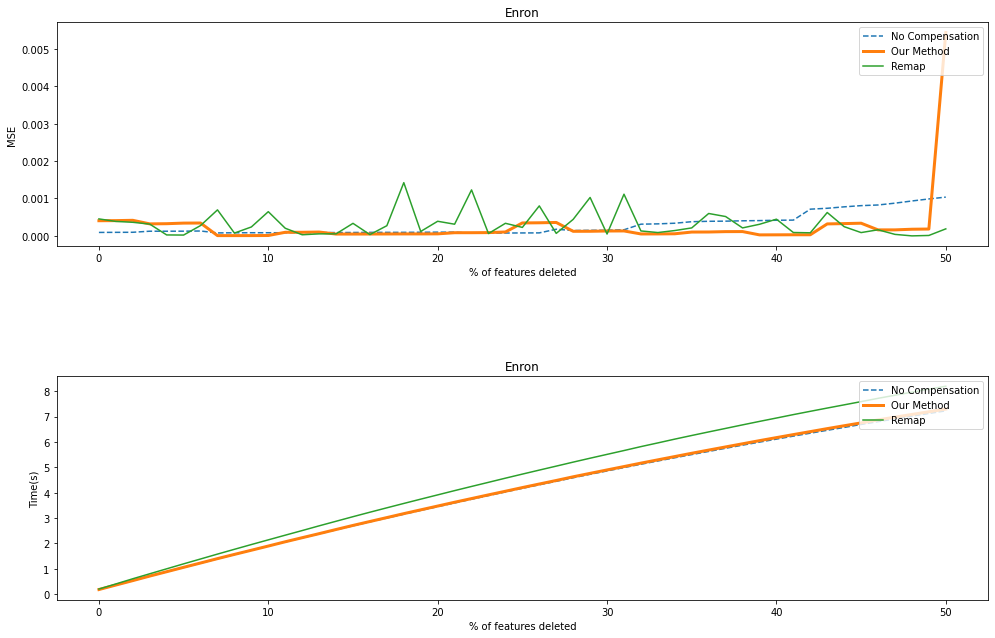

In [143]:
n_pairs = 4
files = {"Enron" : "docword.enron.txt"}

fig, ax = plt.subplots(2, 1)
ax[0].set_title('Enron')
ax[1].set_title('Enron')
ax[0].set(xlabel='% of features deleted', ylabel='MSE')
ax[1].set(xlabel='% of features deleted', ylabel='Time(s)')
it = 0
for x, y in files.items():
    avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = get_all_errors(y, n_pairs, 5, 9)


    print(x, ":", avg_batch_error_a, avg_batch_error_b, avg_batch_error_c)

    # avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = [1,2,4,5,6,8,9,1,4,6], [2,2,4,5,6,8,9,1,4,6], [3,2,4,5,6,8,9,1,4,6], [4,2,4,5,6,8,9,1,4,6], [5,2,4,5,6,8,9,1,4,6], [6,2,4,5,6,8,9,1,4,6]





    ax[0].plot(range(len(avg_batch_error_a)), np.array(avg_batch_error_a)**(0.5), label="No Compensation", linestyle='--')
    ax[0].plot(range(len(avg_batch_error_b)), np.array(avg_batch_error_b)**(0.5), label="Our Method", linewidth=3)
    ax[0].plot(range(len(avg_batch_error_c)), np.array(avg_batch_error_c)**(0.5), label="Remap")
    ax[0].legend(loc='upper right')

    ax[1].plot(range(len(avg_batch_time_a)), avg_batch_time_a, label="No Compensation", linestyle='--')
    ax[1].plot(range(len(avg_batch_time_b)), avg_batch_time_b, label="Our Method", linewidth=3)
    ax[1].plot(range(len(avg_batch_time_c)), avg_batch_time_c, label="Remap")
    ax[1].legend(loc='upper right')
    it+=1
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

#plt.show()
fig.savefig('sample_0002_All_Datasets_1000_'+'.png', orientation = 'landscape')
fig

Feature deletion without bin shrinking

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


Experiment conducted on  1 pair of datapoints
Mapping generated
Experiment conducted on  2 pair of datapoints
Mapping generated
Enron : [0.017359218629082844, 0.017636878829322203, 0.017813867989633695, 0.018086734085497994, 0.018172314319897017, 0.018240749574503213, 0.018323918934003966, 0.018403340550196687, 0.018454197640103136, 0.01804351810077987, 0.018292109532698407, 0.01833081153130072, 0.018476919176843312, 0.01851252966986023, 0.018569804250388657, 0.01484800625377891, 0.01497930375238065, 0.015188906571358655, 0.015188906571358655, 0.015348169046021976, 0.01567232177739386, 0.015801932722366588, 0.01745433755417211, 0.01610333493641756, 0.016207546438966297, 0.016432622663465263, 0.016540929648572747, 0.016562653535872947, 0.016678640185012722, 0.01694549014508814, 0.017206435363568407, 0.017446476382691617, 0.017531350480653435, 0.022749244918912635, 0.023245881893885757, 0.023769733519944332, 0.023815360524382982, 0.024146320922863118, 0.02496026994680691, 0.0251690840865

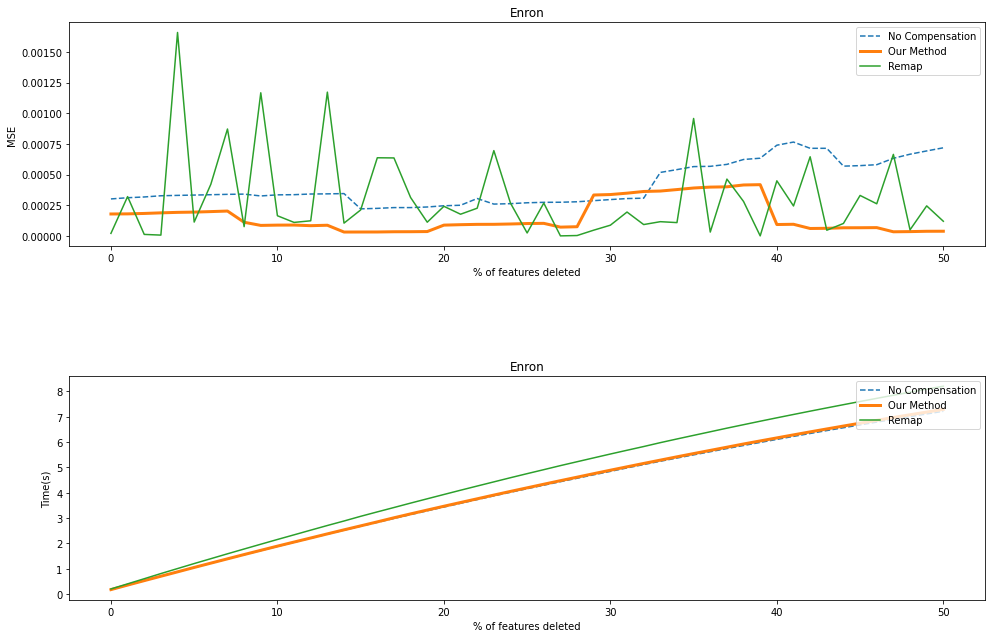

In [144]:
n_pairs = 4
files = {"Enron" : "docword.enron.txt"}

fig, ax = plt.subplots(2, 1)
ax[0].set_title('Enron')
ax[1].set_title('Enron')
ax[0].set(xlabel='% of features deleted', ylabel='MSE')
ax[1].set(xlabel='% of features deleted', ylabel='Time(s)')
it = 0
for x, y in files.items():
    avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = get_all_errors(y, n_pairs, 5, 6)


    print(x, ":", avg_batch_error_a, avg_batch_error_b, avg_batch_error_c)

    # avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = [1,2,4,5,6,8,9,1,4,6], [2,2,4,5,6,8,9,1,4,6], [3,2,4,5,6,8,9,1,4,6], [4,2,4,5,6,8,9,1,4,6], [5,2,4,5,6,8,9,1,4,6], [6,2,4,5,6,8,9,1,4,6]





    ax[0].plot(range(len(avg_batch_error_a)), np.array(avg_batch_error_a)**(0.5), label="No Compensation", linestyle='--')
    ax[0].plot(range(len(avg_batch_error_b)), np.array(avg_batch_error_b)**(0.5), label="Our Method", linewidth=3)
    ax[0].plot(range(len(avg_batch_error_c)), np.array(avg_batch_error_c)**(0.5), label="Remap")
    ax[0].legend(loc='upper right')

    ax[1].plot(range(len(avg_batch_time_a)), avg_batch_time_a, label="No Compensation", linestyle='--')
    ax[1].plot(range(len(avg_batch_time_b)), avg_batch_time_b, label="Our Method", linewidth=3)
    ax[1].plot(range(len(avg_batch_time_c)), avg_batch_time_c, label="Remap")
    ax[1].legend(loc='upper right')
    it+=1
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

#plt.show()
fig.savefig('sample_0001_All_Datasets_1000_'+'.png', orientation = 'landscape')
fig

Function : get_feature_insertion_results will be used by get_all_errors_new to perform feature insertion experiment.

In [145]:
def get_feature_insertion_results(Input_dimension ,Output_dimension ,default_bits ,default_maps ,array1,array2,mapping_scheme=1,max_value=0):

    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    increased_input_dim = int(Input_dimension*2)
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    ct = 0
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension <= increased_input_dim:
        # print("\t", ct)
        ct+=1
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        feature1 = np.random.normal(0,1,size=batch_feature_size)
        feature2 = np.random.normal(0,1,size=batch_feature_size)



        Input_dimension+=batch_feature_size

        t1 = time.time()
        array1,array2 = demo_operator.batch_insert_feature(batch_positions,array1,array2, feature1, feature2)
        # print("batch feature insertion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        inner_product1, inner_product2 = demo_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        batch_time.append(t2-t1)
        # print ("Mapping scheme :",mapping_scheme,"::")
        # print (demo_operator.get_feature_count())
		

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2


Function : get_remap_results_new will be used by get_all_errors_new to perform feature insertion experiment.

In [146]:
def get_remap_results_new(Input_dimension, Output_dimension, array1, array2, mapping_scheme):
    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    reduced_input_dim = int(Input_dimension*2)
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension <= reduced_input_dim:
        # print ("epoch1:::Input Dimension::",Input_dimension)
        
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        Input_dimension+=batch_feature_size
        feature1 = np.random.normal(0,1,size=batch_feature_size)
        feature2 = np.random.normal(0,1,size=batch_feature_size)

        t1 = time.time()
        array1,array2 = demo_operator.batch_insert_feature(batch_positions,array1,array2, feature1, feature2)
        # print("batch feature insertion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        fresh_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
        inner_product1, inner_product2 = fresh_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_time.append((t2-t1)*2)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        # print ("Mapping scheme :",mapping_scheme,"::")
        # print (demo_operator.get_feature_count())
        

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2


Function : get_all_errors_new to perform feature insertion experiment.

In [147]:
def get_all_errors_new(input_file, n_pairs, compensation1, compensation2):
    count = 1
    avg_batch_error_a = []
    avg_batch_error_b = []
    avg_batch_error_c = []
    
    avg_batch_time_a = []
    avg_batch_time_b = []
    avg_batch_time_c = []
    data_array = load_data(input_file,n_pairs)
    print(data_array)
    N = data_array[0].size
    M = 2000

    dataset = input_file.split('.')[1]
    
    while count < n_pairs-1:
        
        mapping = mapper(N,M)
        bits = mapping.bits
        maps = mapping.map

        print("Experiment conducted on",count," pair of datapoints.")
        
        # print ("* Input Dimension of Dataset:",N)
        # print ("* Output (compressed) Dimension of Dataset:",M)
        alpha = 1

        arr1 = data_array[count-1]
        arr2 = data_array[count]

        # print ("* Selected array (1) from Dataset:",arr1)
        # print ("* Selected array (2) from Dataset:",arr2)

        norm_arr_1 = array_normalization(arr1)
        norm_arr_2 = array_normalization(arr2)

        # norm_arr_1 = arr1
        # norm_arr_2 = arr2

        # print ("* Normalized array (1):",norm_arr_1)
        # print ("* Normalized array (2):",norm_arr_2)

        batch_error_a, batch_time_a, batch_inner_product1_a,batch_inner_product2_a,_,_ = get_feature_insertion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=5,max_value=alpha)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error Without Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 Without Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 Without Compensation")

        batch_error_b, batch_time_b,batch_inner_product1_b,batch_inner_product2_b,_,_ = get_feature_insertion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=6,max_value=alpha)

        batch_error_c, batch_time_c, batch_inner_product1_c,batch_inner_product2_c,_,_ = get_remap_results_new(Input_dimension = N,Output_dimension = M,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=6)
        # batch_error_c,batch_inner_product1_c,batch_inner_product2_c,_,_ = get_feature_insertion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=8,max_value=alpha)

        # print(batch_error,batch_inner_product1,batch_inner_product2,array1,array2)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error With Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 With Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 With Compensation")
        # plt.legend()
        # plt.show()
        if count == 1:
            avg_batch_error_a = batch_error_a
            avg_batch_error_b = batch_error_b
            avg_batch_error_c = batch_error_c

            avg_batch_time_a = batch_time_a
            avg_batch_time_b = batch_time_b
            avg_batch_time_c = batch_time_c

            # avg_inner_product1_a = batch_inner_product1_a
            # avg_inner_product2_a = batch_inner_product2_a
            # avg_inner_product1_b = batch_inner_product1_b
            # avg_inner_product2_b = batch_inner_product2_b
            # avg_inner_product1_c = batch_inner_product1_c
            # avg_inner_product2_c = batch_inner_product2_c

        else :
            for i in range(len(batch_error_a)):
                avg_batch_error_a[i] += batch_error_a[i]
                avg_batch_error_b[i] += batch_error_b[i]
                avg_batch_error_c[i] += batch_error_c[i]

                avg_batch_time_a[i] += batch_time_a[i]
                avg_batch_time_b[i] += batch_time_b[i]
                avg_batch_time_c[i] += batch_time_c[i]

                # avg_inner_product1_a[i] += batch_inner_product1_a[i]
                # avg_inner_product2_a[i] += batch_inner_product2_a[i]
                # avg_inner_product1_b[i] += batch_inner_product1_b[i]
                # avg_inner_product2_b[i] += batch_inner_product2_b[i]
                # avg_inner_product1_c[i] += batch_inner_product1_c[i]
                # avg_inner_product2_c[i] += batch_inner_product2_c[i]

        if count%50 == 0 or count == n_pairs-2:
            np.save('sample0000_testing_'+dataset+'_'+str(count)+'.npy', [ (np.array(avg_batch_error_a)/count, np.array(batch_time_a)/count), (np.array(avg_batch_error_b)/count, np.array(batch_time_b)/count), (np.array(avg_batch_error_c)/count, np.array(batch_time_c)/count) ])

        count += 1

    for i in range(len(avg_batch_error_a)):
        avg_batch_error_a[i] /= n_pairs
        avg_batch_error_b[i] /= n_pairs
        avg_batch_error_c[i] /= n_pairs

        avg_batch_time_a[i] /= n_pairs
        avg_batch_time_b[i] /= n_pairs
        avg_batch_time_c[i] /= n_pairs

        # avg_inner_product1_a[i] /= n_pairs
        # avg_inner_product2_a[i] /= n_pairs
        # avg_inner_product1_b[i] /= n_pairs
        # avg_inner_product2_b[i] /= n_pairs
        # avg_inner_product1_c[i] /= n_pairs
        # avg_inner_product2_c[i] /= n_pairs

    avg_batch_time_a=cumulate(avg_batch_time_a)
    avg_batch_time_b=cumulate(avg_batch_time_b)
    avg_batch_time_c=cumulate(avg_batch_time_c)

    return avg_batch_error_a,  avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c


**feature insertion with bin expansion**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]
You are using mapper 6.
Generating Mapping. Please wait
Mapping generated
Experiment conducted on 1  pair of datapoints.
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generated
Mapping generate

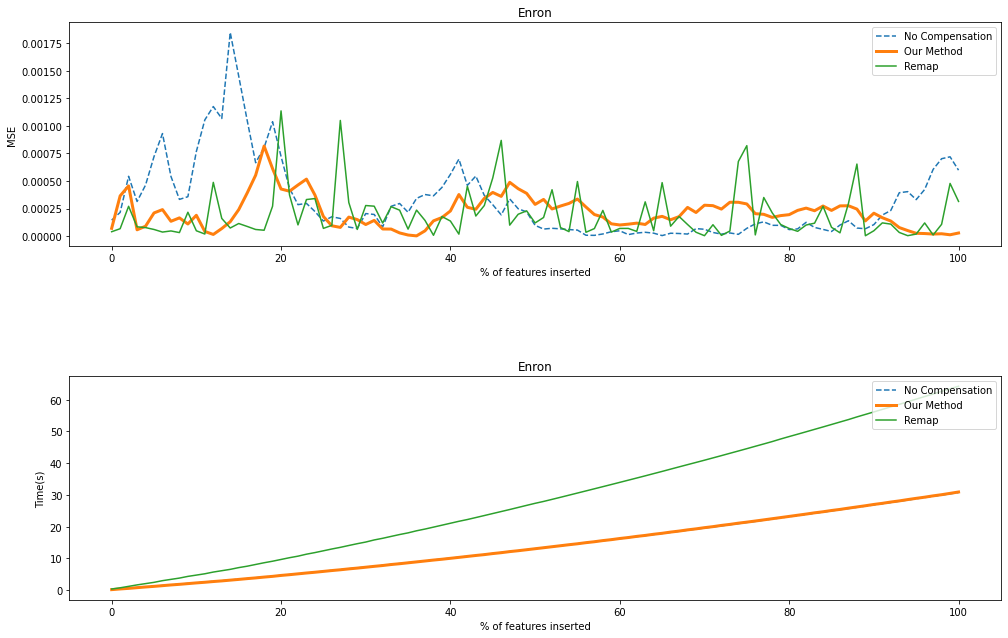

In [148]:
n_pairs = 4
files = {"Enron" : "docword.enron.txt"}

fig, ax = plt.subplots(2, 1)
ax[0].set_title('Enron')
ax[1].set_title('Enron')
ax[0].set(xlabel='% of features inserted', ylabel='MSE')
ax[1].set(xlabel='% of features inserted', ylabel='Time(s)')
it = 0
for x, y in files.items():
    avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = get_all_errors_new(y, n_pairs, 5, 6)


    print(x, ":", avg_batch_error_a, avg_batch_error_b, avg_batch_error_c)

    # avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = [1,2,4,5,6,8,9,1,4,6], [2,2,4,5,6,8,9,1,4,6], [3,2,4,5,6,8,9,1,4,6], [4,2,4,5,6,8,9,1,4,6], [5,2,4,5,6,8,9,1,4,6], [6,2,4,5,6,8,9,1,4,6]





    ax[0].plot(range(len(avg_batch_error_a)), np.array(avg_batch_error_a)**(0.5), label="No Compensation", linestyle='--')
    ax[0].plot(range(len(avg_batch_error_b)), np.array(avg_batch_error_b)**(0.5), label="Our Method", linewidth=3)
    ax[0].plot(range(len(avg_batch_error_c)), np.array(avg_batch_error_c)**(0.5), label="Remap")
    ax[0].legend(loc='upper right')

    ax[1].plot(range(len(avg_batch_time_a)), avg_batch_time_a, label="No Compensation", linestyle='--')
    ax[1].plot(range(len(avg_batch_time_b)), avg_batch_time_b, label="Our Method", linewidth=3)
    ax[1].plot(range(len(avg_batch_time_c)), avg_batch_time_c, label="Remap")
    ax[1].legend(loc='upper right')
    it+=1
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

#plt.show()
fig.savefig('sample_0000_All_Datasets_1000_'+'.png', orientation = 'landscape')
fig